In [2]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Function to load and show images
def load_and_show_images(directory):
    image_paths = glob.glob(os.path.join(directory, "*.png"))
    images = [Image.open(img_path) for img_path in image_paths[:5]]
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, (img, ax) in enumerate(zip(images, axes)):
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Image {i+1}")
    plt.show()

In [4]:
# Function to load and show reports
def load_and_show_reports(directory):
    report_paths = glob.glob(os.path.join(directory, "*.txt"))
    for report_path in report_paths[:5]:
        with open(report_path, "r") as file:
            report_content = file.read()
        print(f"Report Path: {report_path}\nReport Content:\n{report_content}\n{'-'*50}")


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Load and show images from each directory
directories = [
    r"/content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Original_Images/anemic",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Original_Images/healthy",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Binary_Segmented/anemic",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Binary_Segmented/healthy",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/RGB_Segmented/anemic",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/RGB_Segmented/healthy"
]

Showing images from /content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Original_Images/anemic:


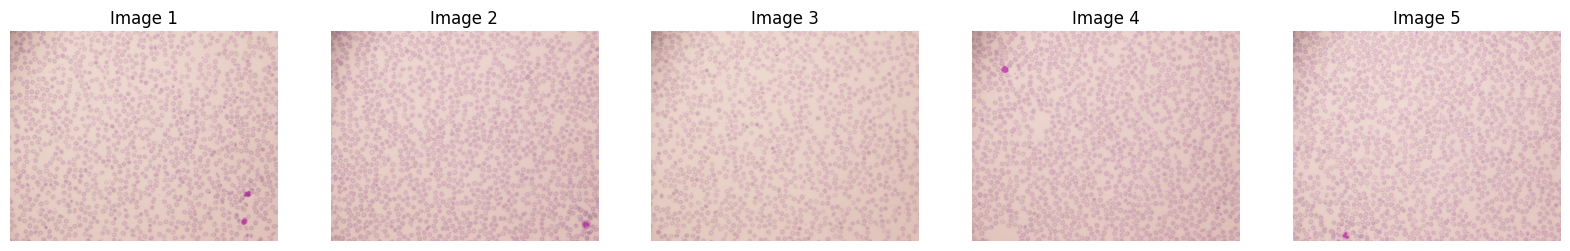

Showing images from /content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Original_Images/healthy:


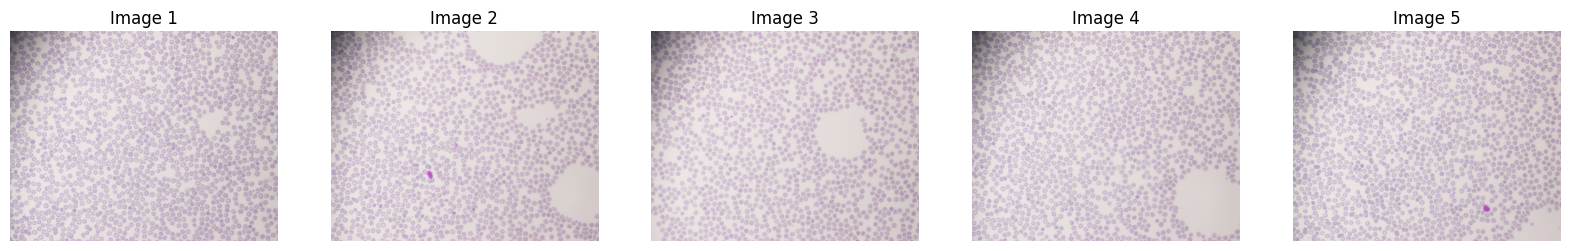

Showing images from /content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Binary_Segmented/anemic:


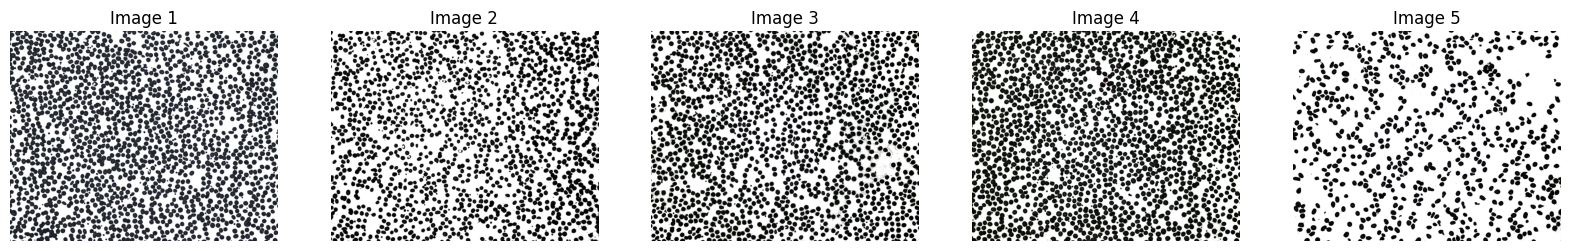

Showing images from /content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/Binary_Segmented/healthy:


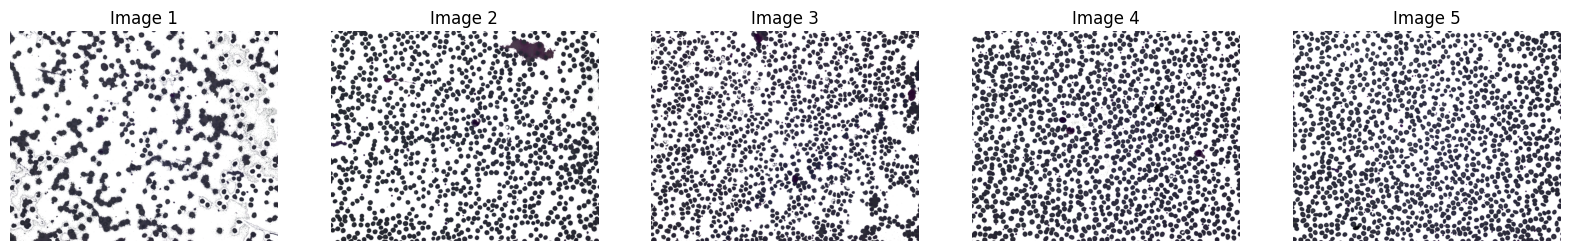

Showing images from /content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/RGB_Segmented/anemic:


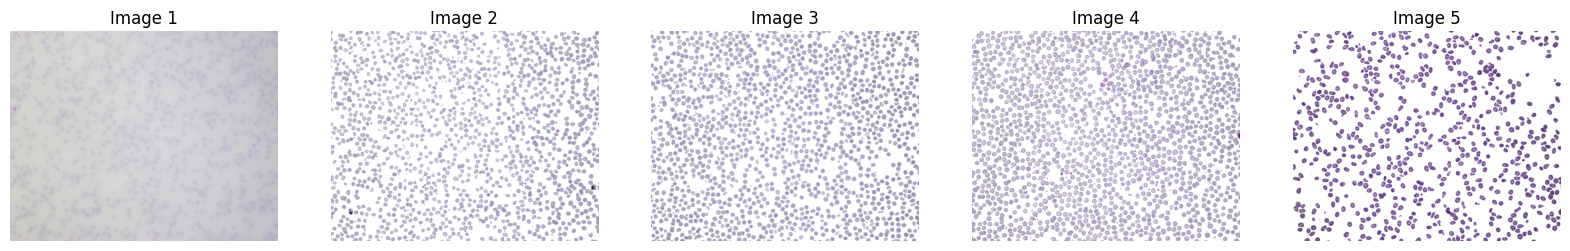

Showing images from /content/drive/MyDrive/Anemic_RBC_dataset/AneRBC-I/RGB_Segmented/healthy:


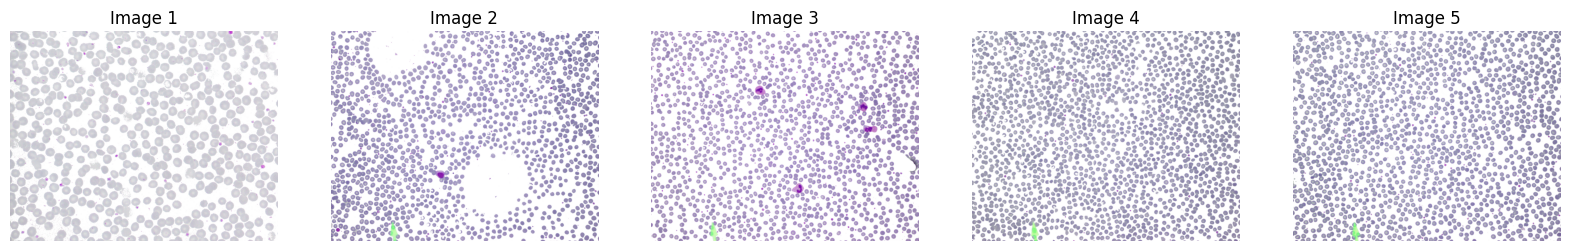

In [7]:
for directory in directories:
    print(f"Showing images from {directory}:")
    load_and_show_images(directory)


In [8]:
# Load and show relevant reports
report_directories = [
    r"/content/drive/MyDrive/Anemic_RBC_dataset/Reports/Anemic/CBC",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/Reports/Anemic/Morphology",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/Reports/Healthy/CBC",
    r"/content/drive/MyDrive/Anemic_RBC_dataset/Reports/Healthy/Morphology"
]

In [9]:
for report_directory in report_directories:
    print(f"Showing reports from {report_directory}:")
    load_and_show_reports(report_directory)


Showing reports from /content/drive/MyDrive/Anemic_RBC_dataset/Reports/Anemic/CBC:
Report Path: /content/drive/MyDrive/Anemic_RBC_dataset/Reports/Anemic/CBC/393_a.txt
Report Content:
Test,Result/Units,Norm. Range 
WBC,8.44 x10.e 3/μl,4 --- 10
RBC,4.36 x10.e 6/μl,3.8 --- 4.8
HGB,* 11.1 g/dL,12 --- 15
HCT,* 34.2 %,36 --- 46
MCV,78.4 FL,76 --- 96
MCH,* 25.5 pg,27 --- 32
MCHC,32.5 g/dL,31.5 --- 34.5
PLT,409 x10.e 3/μl,150 --- 450
MPV,11 fL,7.2 --- 11

--------------------------------------------------
Report Path: /content/drive/MyDrive/Anemic_RBC_dataset/Reports/Anemic/CBC/245_a.txt
Report Content:
Test,Result/Units,Norm. Range 
WBC,4.76 x10^3/µl,5 --- 15 x10^3/µl
RBC,5.37 x10^6/µl,4 --- 5.2 x10^6/µl
HGB,10 g/dL,11 --- 14 g/dL
HCT,34.4%,34 --- 40%
MCV,64.1 fL,75 --- 87 fL
MCH,18.6 pg,24 --- 30 pg
MCHC,29.1 g/dL,31 --- 37 g/dL
RDW---CV,17.9%,11.5 --- 14.5%
PLT,48 x10^3/µl,150 --- 450 x10^3/µl
Neut,21.9%,1.5 --- 8%
LYMP,67.4%,6 --- 9%
MONO,5.9%,*
EOS,4.6%,*
BASO,0.2%,*

--------------------

In [10]:
# Split the data into training, test, and validation sets
def split_data(directory):
    image_paths = glob.glob(os.path.join(directory, "*.png"))
    total_images = len(image_paths)
    train_count = int(0.7 * total_images)
    test_count = int(0.2 * total_images)
    train_images = image_paths[:train_count]
    test_images = image_paths[train_count:train_count+test_count]
    val_images = image_paths[train_count+test_count:]
    return train_images, test_images, val_images
